<a href="https://colab.research.google.com/github/jakovitz-W/CreditFraudDetection/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NOTE: Dataset is too large to be committed to github, download & move csv file into working directory

In [10]:
%pip install matplotlib
%pip install pandas

In [11]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import f1_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score, precision_score, recall_score, RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import Perceptron

In [14]:
#data preperation
df = pd.DataFrame(pd.read_csv("creditcard.csv"))

X_data = df[['V11', 'V12', 'V14', 'V16', 'V27', 'V28']]
y_data = df['Class']

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_index, test_index = next(sss.split(X_data, y_data))

X_train = X_data.loc[train_index]
y_train = y_data.loc[train_index]

X_test = X_data.loc[test_index]
y_test = y_data.loc[test_index]


KNN Classifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=3, p=2, metric='euclidean')
knn.fit(X_train, y_train)
scores = knn.predict_proba(X_test)
y_pred_knn = knn.predict(X_test)

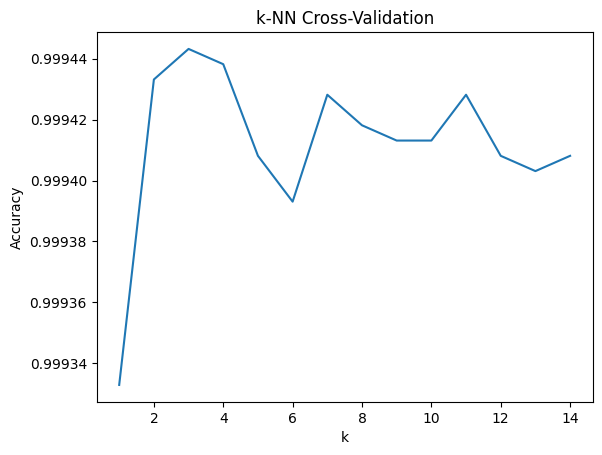

Optimal k-value: 3


In [ ]:
k_values = list(range(1, 15))

#this loop takes so long
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='euclidean')
    scores = cross_val_score(knn, X_train,y_train, cv=5, scoring="accuracy")
    cv_scores.append(scores.mean())

# Plot results
plt.plot(k_values, cv_scores)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("k-NN Cross-Validation")
plt.show()

# Determine optimal k-value
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print("Optimal k-value:", optimal_k)

Accuracy: 0.9994265182636377
Precision: 0.9304347826086956
Recall: 0.722972972972973
F1 Score: 0.8136882129277566


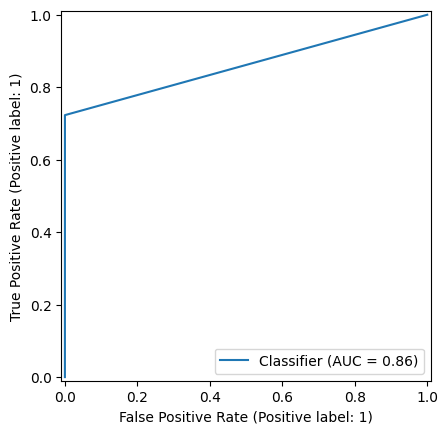

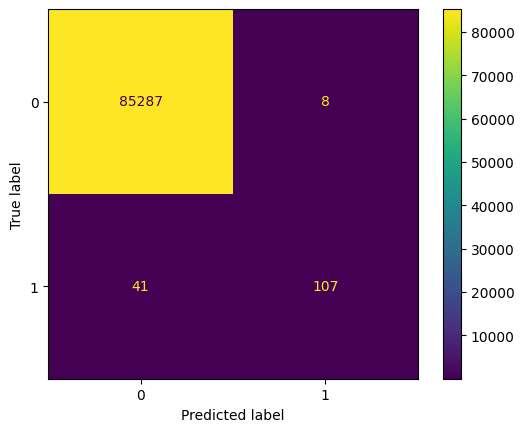

In [ ]:
#metrics
conf_matrix = confusion_matrix(y_test,y_pred_knn)
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

roc_disp = RocCurveDisplay.from_predictions(y_test, y_pred_knn)

# The knn classifier is redefined in the loop for finding the optimal k value
# Reinitialize and fit the knn classifier with the optimal k value before generating the confusion matrix
knn = KNeighborsClassifier(n_neighbors=optimal_k, p=2, metric='euclidean') # Reinitialize knn with optimal_k
knn.fit(X_train, y_train) # Re-fit

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_) # Now knn.classes_ will be available

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

disp.plot()
plt.show()

Random Forest

In [16]:
randforest = RandomForestClassifier()
randforest.fit(X_train, y_train)

y_pred_rf = randforest.predict(X_test)

scores = randforest.predict_proba(X_test)

In [ ]:
#TODO:
#tune hyperparameter, ref: https://www.datacamp.com/tutorial/random-forests-classifier-python
#plot tree
# Set up parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

# Perform grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1', verbose=1)
grid_search.fit(X_train, y_train)

# Best estimator
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict using the best model
y_pred_rf = best_rf.predict(X_test)

# Metrics
conf_matrix = confusion_matrix(y_test, y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_rf.classes_)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
disp.plot()
plt.show()

Fitting 3 folds for each of 8 candidates, totalling 24 fits


Accuracy: 0.9994616293903538
Precision: 0.9322033898305084
Recall: 0.7432432432432432
F1 Score: 0.8270676691729323


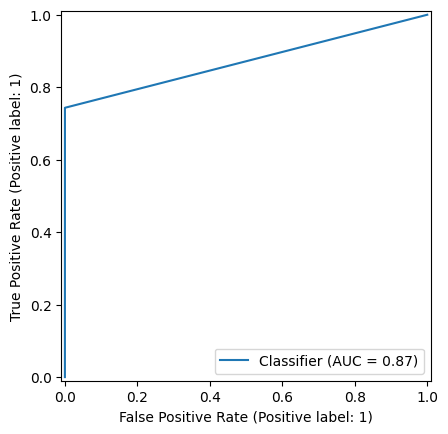

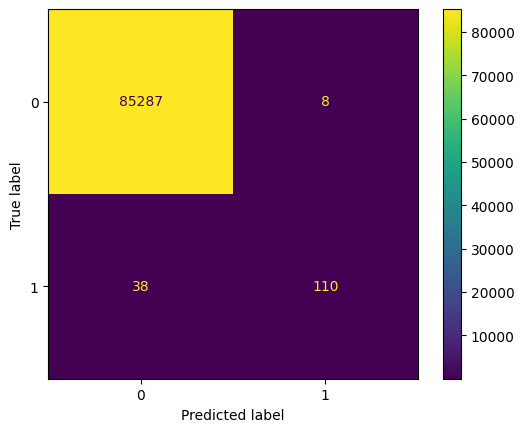

In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

roc_disp = RocCurveDisplay.from_predictions(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=randforest.classes_)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

disp.plot()
plt.show()

AdaBoost

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters: {'learning_rate': 1.5, 'n_estimators': 200}
Accuracy: 0.9991924440855307
Precision: 0.8319327731092437
Recall: 0.668918918918919
F1 Score: 0.7415730337078652


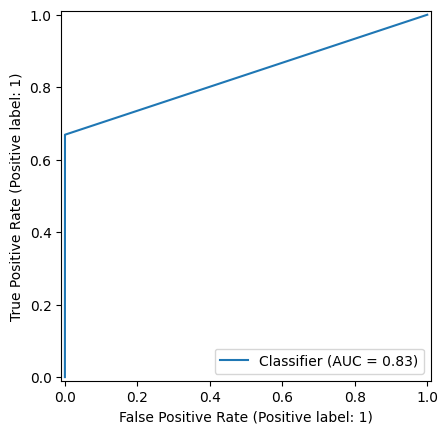

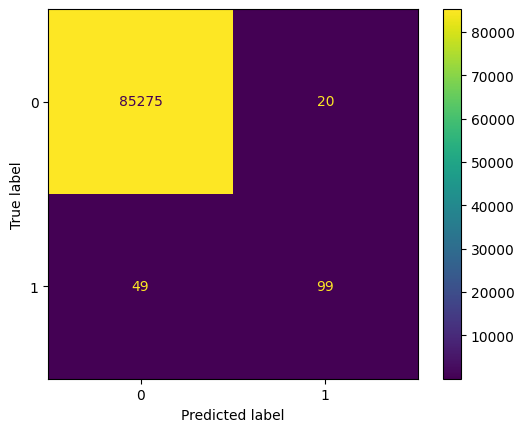

In [ ]:
#ref: https://www.datacamp.com/tutorial/adaboost-classifier-python
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
# Define parameter grid for AdaBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.5, 1.0, 1.5]
}

# Grid search with 3-fold cross-validation
grid_search = GridSearchCV(
    AdaBoostClassifier(random_state=42),
    param_grid,
    scoring='f1',
    cv=3,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Best AdaBoost model
best_ada = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict and evaluate
y_pred_ada = best_ada.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_ada)
accuracy = accuracy_score(y_test, y_pred_ada)
precision = precision_score(y_test, y_pred_ada)
recall = recall_score(y_test, y_pred_ada)
f1 = f1_score(y_test, y_pred_ada)

roc_disp = RocCurveDisplay.from_predictions(y_test, y_pred_ada)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_ada.classes_)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

disp.plot()
plt.show()

In [ ]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

Accuracy: 0.9989817773252344
Precision: 0.7904761904761904
Recall: 0.5608108108108109
F1 Score: 0.6561264822134387


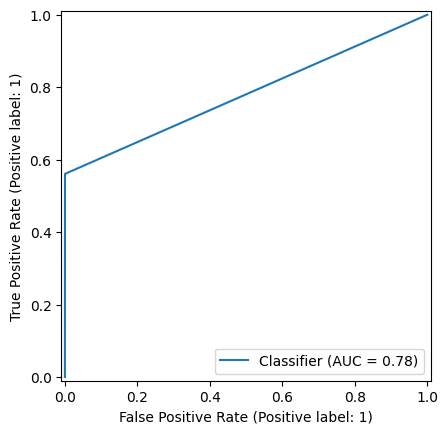

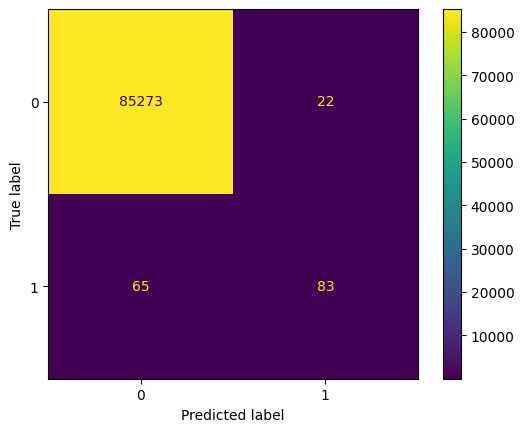

In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred_ada)
accuracy = accuracy_score(y_test, y_pred_ada)
precision = precision_score(y_test, y_pred_ada)
recall = recall_score(y_test, y_pred_ada)
f1 = f1_score(y_test, y_pred_ada)

roc_disp = RocCurveDisplay.from_predictions(y_test, y_pred_ada)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=ada.classes_)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

disp.plot()
plt.show()

Perceptron (Neural Network)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best Parameters: {'alpha': 0.0001, 'class_weight': None, 'eta0': 0.5, 'max_iter': 1000, 'penalty': None}
Accuracy: 0.9990285921608558
Precision: 0.8494623655913979
Recall: 0.5337837837837838
F1 Score: 0.6556016597510373


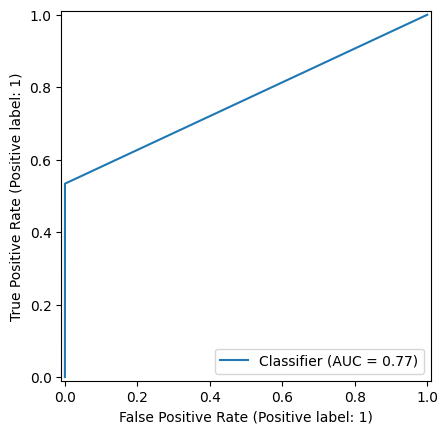

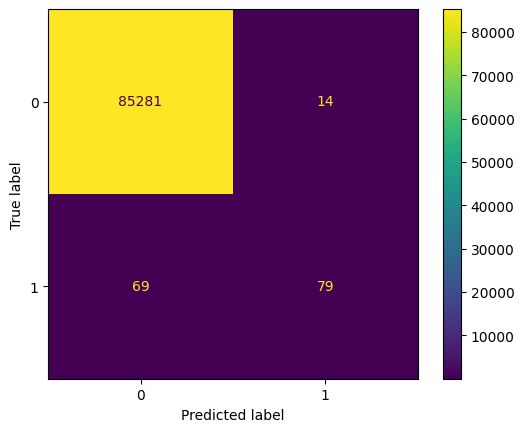

In [ ]:
#ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html
# Define hyperparameter grid
param_grid = {
    'penalty': [None, 'l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],  # regularization strength
    'eta0': [0.1, 0.5, 1.0],         # learning rate
    'max_iter': [1000, 2000],
    'class_weight': [None, 'balanced']
}

# Grid search
grid_search = GridSearchCV(
    Perceptron(random_state=42),
    param_grid,
    scoring='f1',
    cv=3,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Best model
best_perceptron = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict and evaluate
y_pred_pt = best_perceptron.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_pt)
accuracy = accuracy_score(y_test, y_pred_pt)
precision = precision_score(y_test, y_pred_pt)
recall = recall_score(y_test, y_pred_pt)
f1 = f1_score(y_test, y_pred_pt)

roc_disp = RocCurveDisplay.from_predictions(y_test, y_pred_pt)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_perceptron.classes_)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

disp.plot()
plt.show()

In [ ]:
perceptron = Perceptron(class_weight="balanced")
perceptron.fit(X_train, y_train)
y_pred_pt = perceptron.predict(X_test)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'class_weight': None, 'eta0': 1.0}
Accuracy: 0.9990402958697612
Precision: 0.6987951807228916
Recall: 0.7837837837837838
F1 Score: 0.7388535031847133


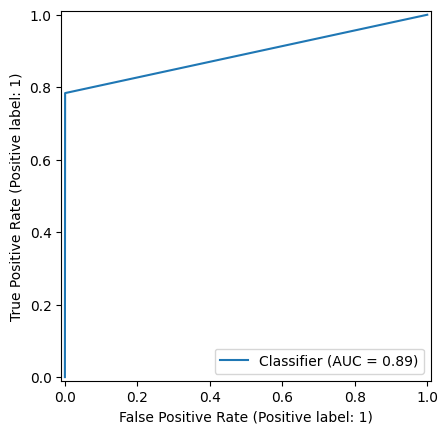

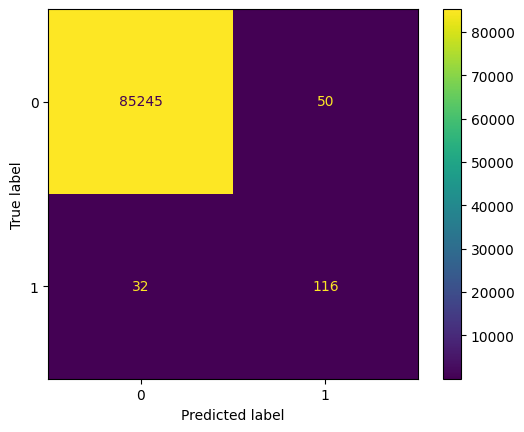

In [ ]:
#TODO
#tune class weights
#tune learning rate
# Focused hyperparameter grid
param_grid = {
    'class_weight': [None, 'balanced'],
    'eta0': [0.001, 0.01, 0.1, 1.0],  # learning rate
}

# Grid search setup
grid_search = GridSearchCV(
    Perceptron(random_state=42),
    param_grid,
    scoring='f1',
    cv=3,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Best model
best_perceptron = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict and evaluate
y_pred_pt = best_perceptron.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_pt)
accuracy = accuracy_score(y_test, y_pred_pt)
precision = precision_score(y_test, y_pred_pt)
recall = recall_score(y_test, y_pred_pt)
f1 = f1_score(y_test, y_pred_pt)

roc_disp = RocCurveDisplay.from_predictions(y_test, y_pred_pt)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_perceptron.classes_)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

disp.plot()
plt.show()

Accuracy: 0.9990402958697612
Precision: 0.6987951807228916
Recall: 0.7837837837837838
F1 Score: 0.7388535031847133


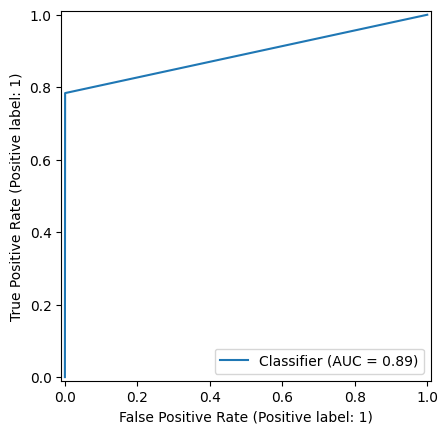

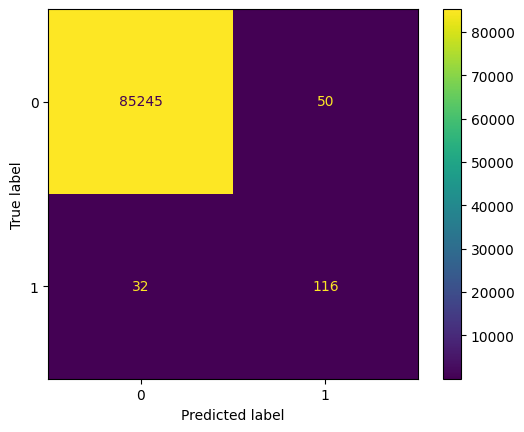

In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred_pt)
accuracy = accuracy_score(y_test, y_pred_pt)
precision = precision_score(y_test, y_pred_pt)
recall = recall_score(y_test, y_pred_pt)
f1 = f1_score(y_test, y_pred_pt)

roc_disp = RocCurveDisplay.from_predictions(y_test, y_pred_pt)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=perceptron.classes_)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

disp.plot()
plt.show()

Preprocessing/Feature Analysis

In [ ]:
#create dataframes

df = pd.DataFrame(pd.read_csv("creditcard.csv"))

frauds = df.where(df["Class"] == 1)
frauds.dropna(inplace=True)
print(frauds.head())

legit = df.where(df["Class"] == 0)
legit.dropna(inplace=True)

legit = legit.sample(frac=0.005, replace=False, random_state=1)

        Time        V1        V2        V3        V4        V5        V6  \
541    406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920  4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108  6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329  7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   

            V7        V8        V9  ...       V21       V22       V23  \
541  -2.537387  1.391657 -2.770089  ...  0.517232 -0.035049 -0.465211   
623   0.325574 -0.067794 -0.270953  ...  0.661696  0.435477  1.375966   
4920  0.562320 -0.399147 -0.238253  ... -0.294166 -0.932391  0.172726   
6108 -3.496197 -0.248778 -0.247768  ...  0.573574  0.176968 -0.436207   
6329  1.713445 -0.496358 -1.282858  ... -0.379068 -0.704181 -0.656805   

           V24       V25       V26       V27       V28  Amount  Class  
541   0.320198  0.044519  0.1778

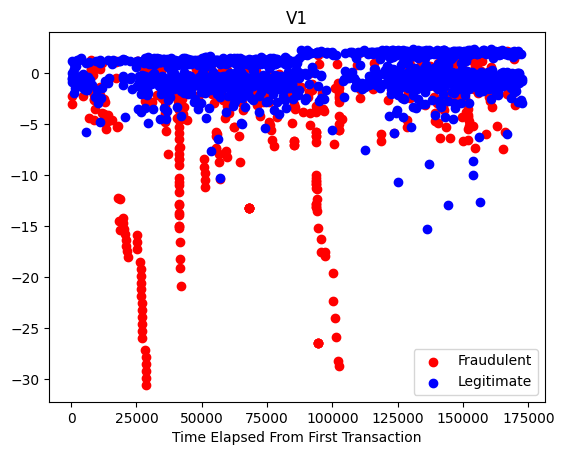

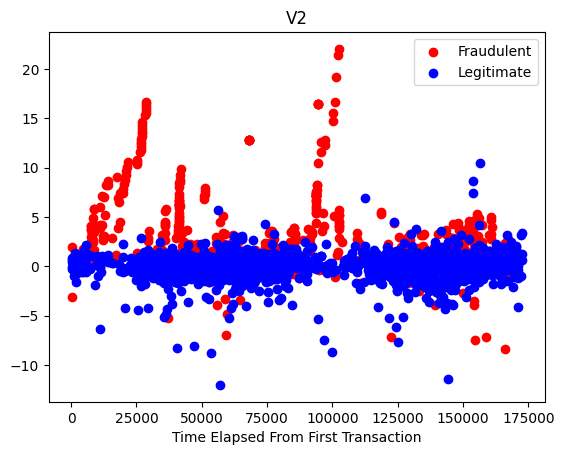

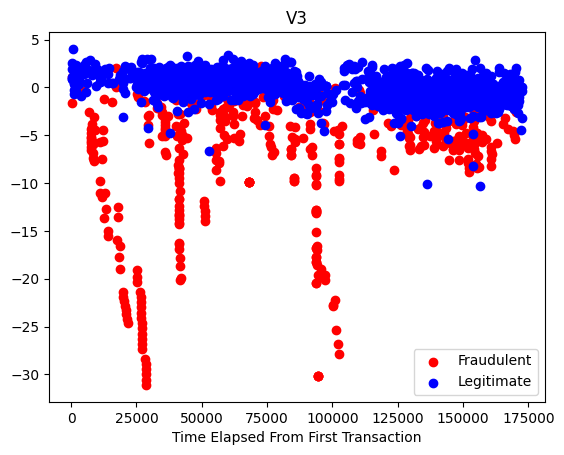

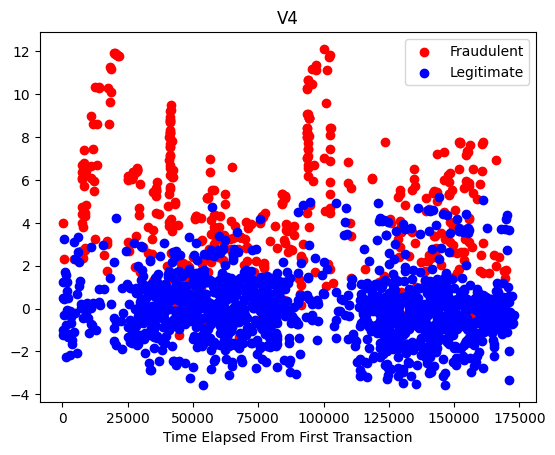

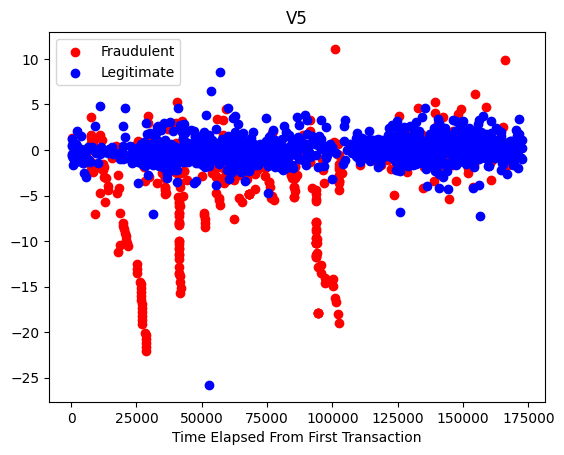

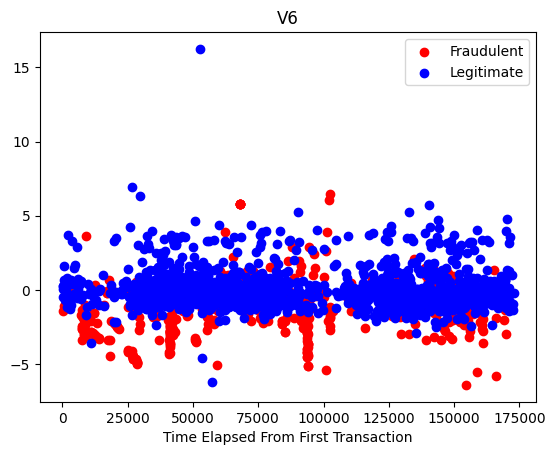

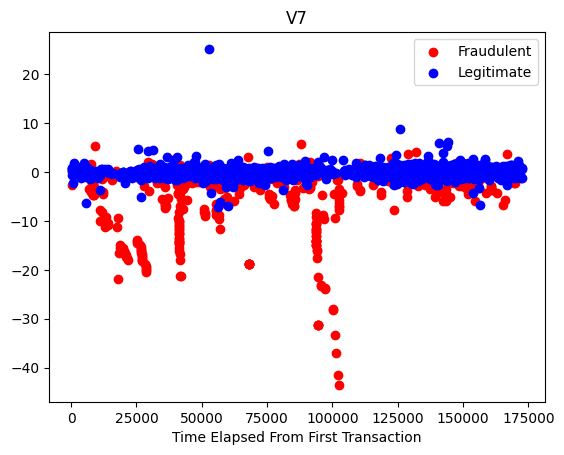

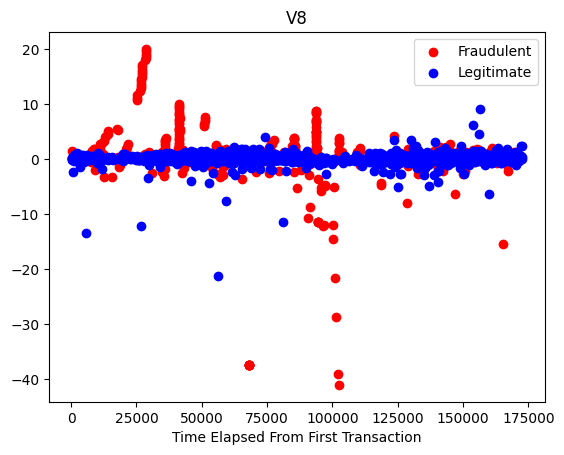

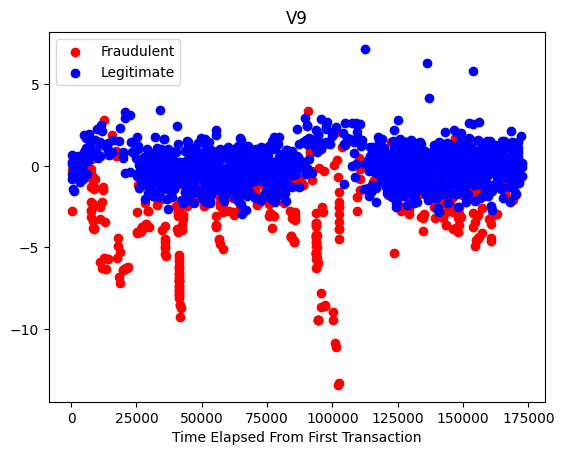

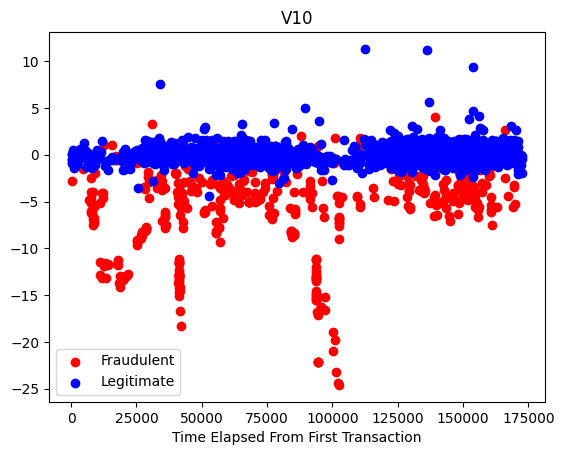

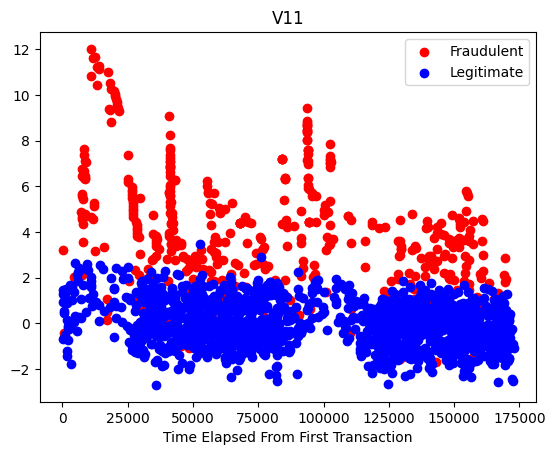

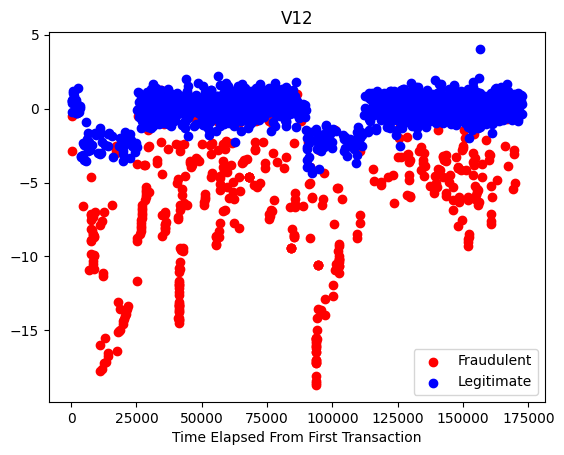

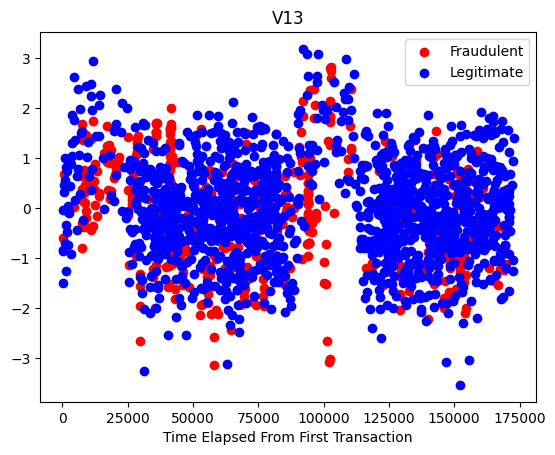

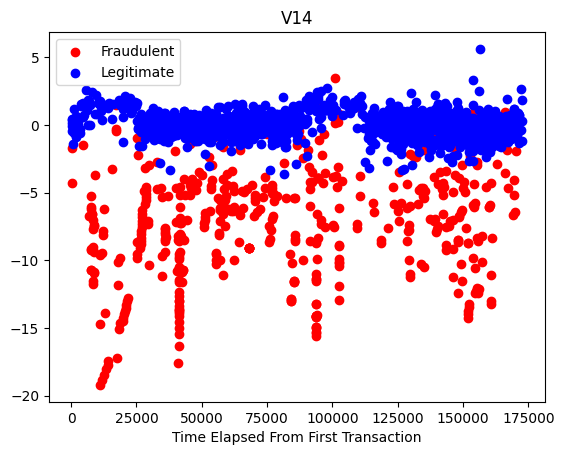

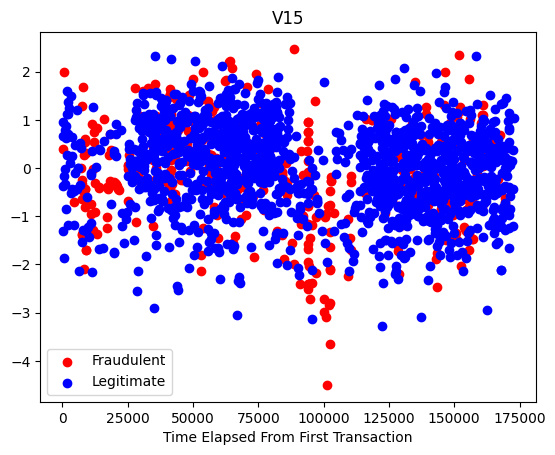

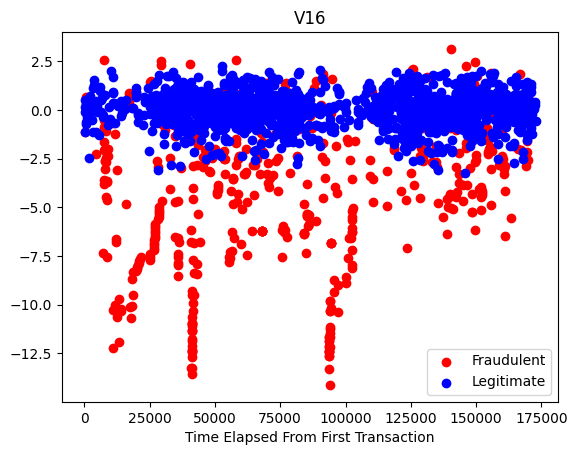

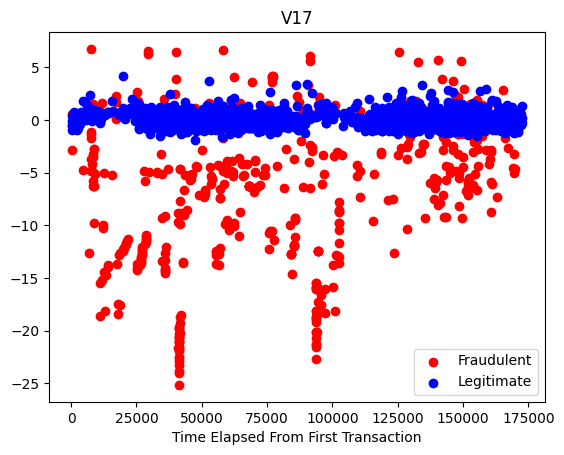

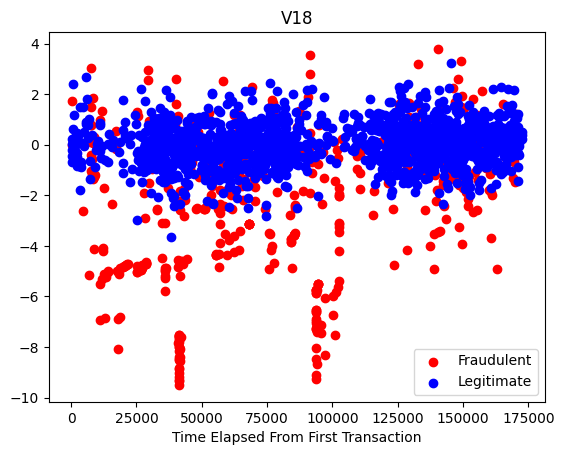

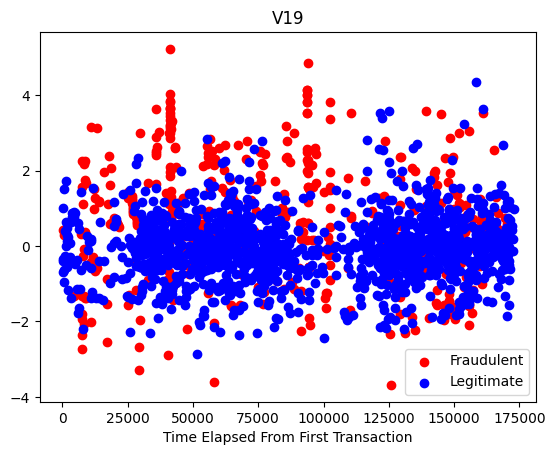

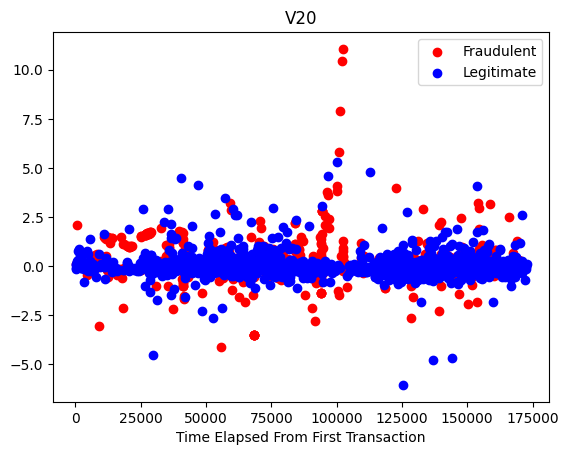

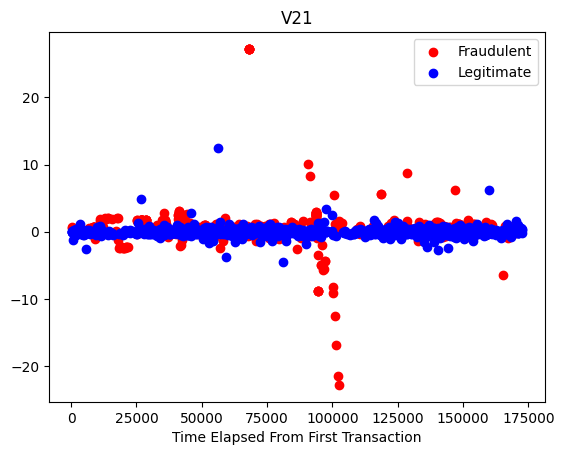

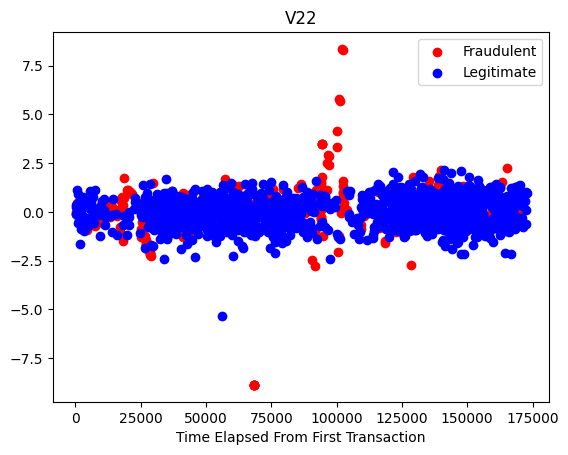

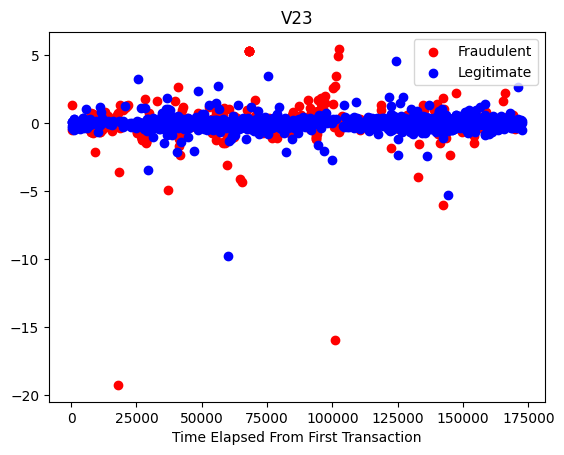

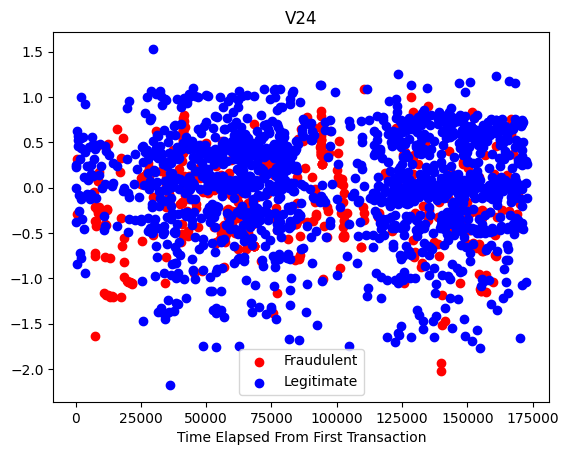

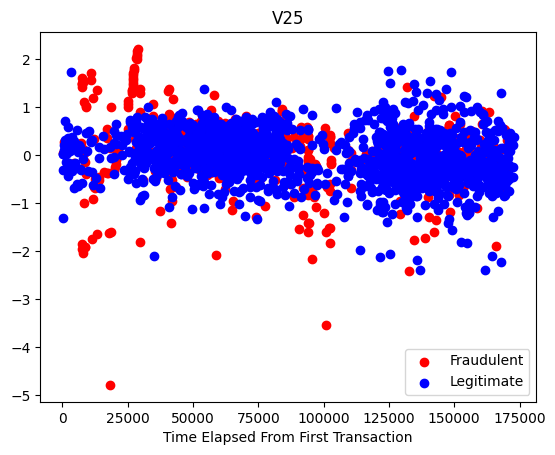

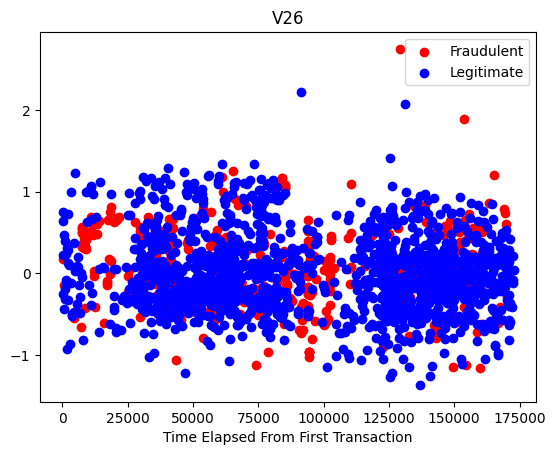

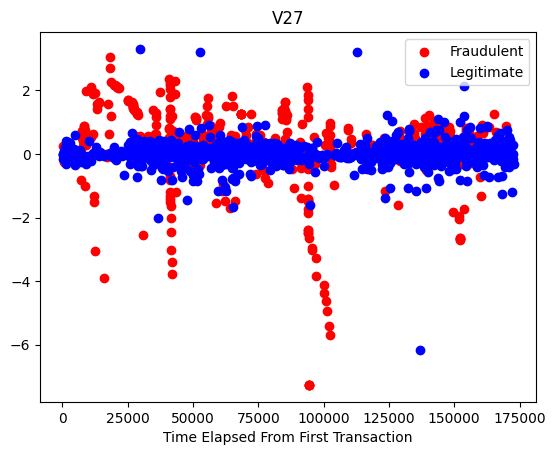

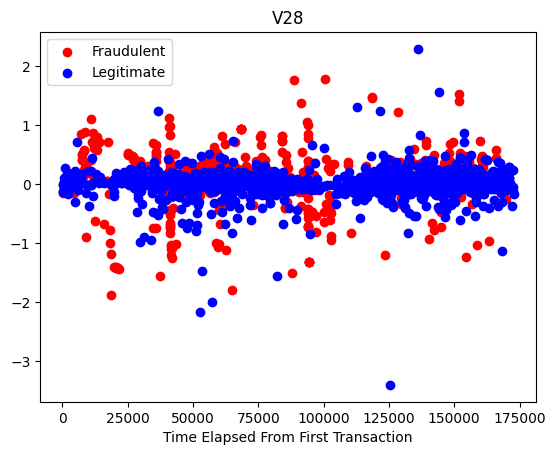

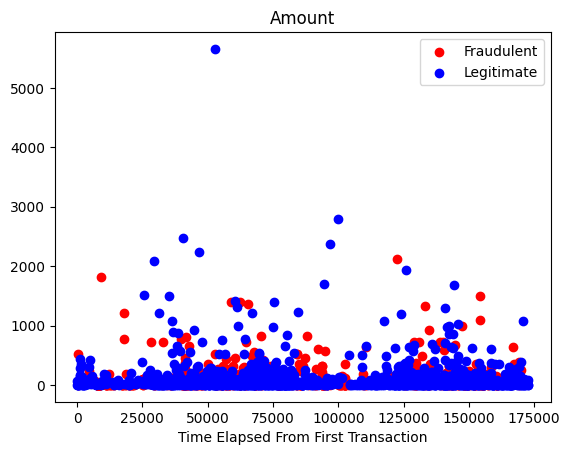

In [ ]:
#plots
plt.scatter(frauds['Time'], frauds['V1'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V1'], color="blue", label='Legitimate')

plt.title("V1")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V2'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V2'], color="blue", label='Legitimate')

plt.title("V2")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V3'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V3'], color="blue", label='Legitimate')

plt.title("V3")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V4'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V4'], color="blue", label='Legitimate')

plt.title("V4")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V5'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V5'], color="blue", label='Legitimate')

plt.title("V5")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V6'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V6'], color="blue", label='Legitimate')

plt.title("V6")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V7'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V7'], color="blue", label='Legitimate')

plt.title("V7")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V8'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V8'], color="blue", label='Legitimate')

plt.title("V8")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V9'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V9'], color="blue", label='Legitimate')

plt.title("V9")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V10'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V10'], color="blue", label='Legitimate')

plt.title("V10")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V11'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V11'], color="blue", label='Legitimate')

plt.title("V11")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V12'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V12'], color="blue", label='Legitimate')

plt.title("V12")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V13'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V13'], color="blue", label='Legitimate')

plt.title("V13")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V14'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V14'], color="blue", label='Legitimate')

plt.title("V14")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V15'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V15'], color="blue", label='Legitimate')

plt.title("V15")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V16'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V16'], color="blue", label='Legitimate')

plt.title("V16")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V17'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V17'], color="blue", label='Legitimate')

plt.title("V17")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V18'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V18'], color="blue", label='Legitimate')

plt.title("V18")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V19'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V19'], color="blue", label='Legitimate')

plt.title("V19")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V20'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V20'], color="blue", label='Legitimate')

plt.title("V20")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V21'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V21'], color="blue", label='Legitimate')

plt.title("V21")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V22'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V22'], color="blue", label='Legitimate')

plt.title("V22")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V23'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V23'], color="blue", label='Legitimate')

plt.title("V23")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V24'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V24'], color="blue", label='Legitimate')

plt.title("V24")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V25'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V25'], color="blue", label='Legitimate')

plt.title("V25")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V26'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V26'], color="blue", label='Legitimate')

plt.title("V26")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()


plt.scatter(frauds['Time'], frauds['V27'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V27'], color="blue", label='Legitimate')

plt.title("V27")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['V28'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['V28'], color="blue", label='Legitimate')

plt.title("V28")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()

plt.scatter(frauds['Time'], frauds['Amount'], color="red", label='Fraudulent')
plt.scatter(legit['Time'], legit['Amount'], color="blue", label='Legitimate')

plt.title("Amount")
plt.xlabel('Time Elapsed From First Transaction')
plt.legend()
plt.show()